In [1]:
%matplotlib inline

import glob
import os
import re

import matplotlib.image as mpimg
import pandas as pd
import PIL
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import skimage.morphology as morph
from skimage import io, color
from PIL import Image
import skimage

## Funciones de utilidad 

In [2]:
def img_read(filename, mode = 'color'):
    if(mode == 'color'):   
        return cv2.cvtColor(cv2.imread(filename),cv2.COLOR_BGR2RGB)
    elif(mode=='grayscale' or mode=='greyscale' or mode == 'gray' or mode == 'grey'):
        return cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    elif(mode=='yuv' or mode=='YUV'):
        return cv2.cvtColor(cv2.imread(filename),cv2.COLOR_BGR2YUV)
    elif(mode=='hsv' or mode=='HSV'):
        return cv2.cvtColor(cv2.imread(filename),cv2.COLOR_BGR2HSV)
    elif(mode=='lab' or mode=='LAB'):
        return cv2.cvtColor(cv2.imread(filename),cv2.COLOR_BGR2LAB)
    else:
        return None

def norm_image(img):
    img_pil = Image.fromarray(img)
    """
    Normalize PIL image
    
    Normalizes luminance to (mean,std)=(0,1), and applies a [1%, 99%] contrast stretch
    """
    img_y, img_b, img_r = img_pil.convert('YCbCr').split()
    
    img_y_np = np.asarray(img_y).astype(float)

    img_y_np /= 255
    img_y_np -= img_y_np.mean()
    img_y_np /= img_y_np.std()
    scale = np.max([np.abs(np.percentile(img_y_np, 1.0)),
                    np.abs(np.percentile(img_y_np, 99.0))])
    img_y_np = img_y_np / scale
    img_y_np = np.clip(img_y_np, -1.0, 1.0)
    img_y_np = (img_y_np + 1.0) / 2.0
    
    img_y_np = (img_y_np * 255 + 0.5).astype(np.uint8)

    img_y = Image.fromarray(img_y_np)

    img_ybr = Image.merge('YCbCr', (img_y, img_b, img_r))
    
    img_nrm = img_ybr.convert('RGB')
    
    open_cv_image = np.array(img_nrm) 
    
    return open_cv_image

def detect_edge(image, umbral_min, umbral_max, titulo = "Imagen original",canal = ""):
    image_with_edges = cv2.Canny(image, umbral_min, umbral_max)
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 6))
    fig.suptitle(canal, fontsize=15)
    ax1.set_title(titulo)
    ax1.imshow(image, cmap='gray')
    ax2.set_title('Bordes')
    ax2.imshow(image_with_edges, cmap='gray')

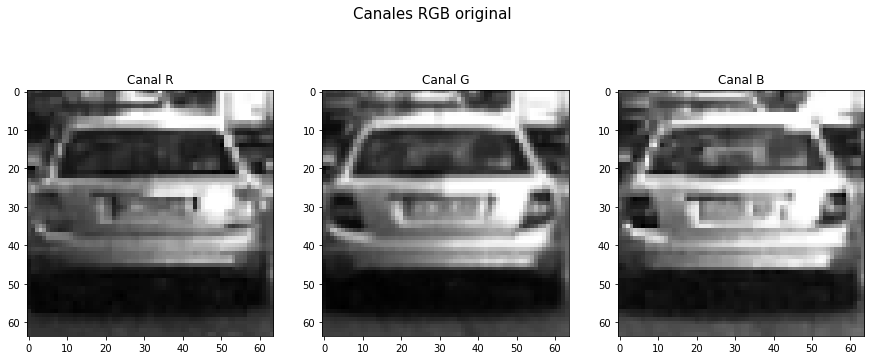

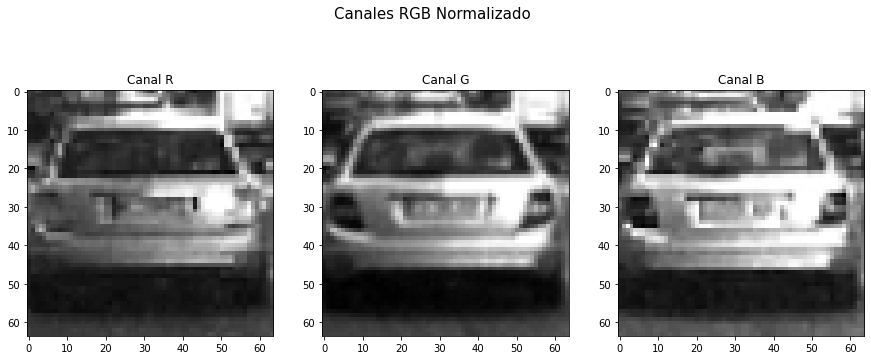

In [3]:
image_path = '145.png'
img_rgb = img_read('../data/vehicles/'+image_path)
img_norm = norm_image(img_rgb)

#Modelo RGB
img_R = img_rgb[:,:,0]
img_G = img_rgb[:,:,1]
img_B = img_rgb[:,:,2]

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15, 6))

fig.suptitle('Canales RGB original', fontsize=15)
ax1.set_title('Canal R')
ax1.imshow(img_R, cmap='gray')
ax2.set_title('Canal G')
ax2.imshow(img_G, cmap='gray')
ax3.set_title('Canal B')
ax3.imshow(img_B, cmap='gray')

#Modelo RGB
img_R = img_norm[:,:,0]
img_G = img_norm[:,:,1]
img_B = img_norm[:,:,2]

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15, 6))

fig.suptitle('Canales RGB Normalizado', fontsize=15)
ax1.set_title('Canal R')
ax1.imshow(img_R, cmap='gray')
ax2.set_title('Canal G')
ax2.imshow(img_G, cmap='gray')
ax3.set_title('Canal B')
ax3.imshow(img_B, cmap='gray')

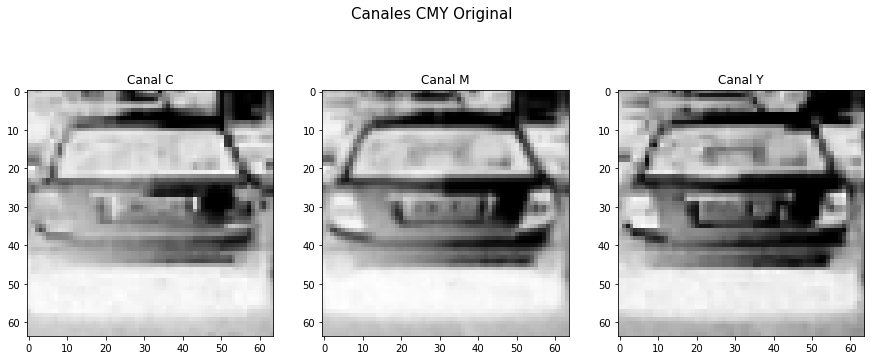

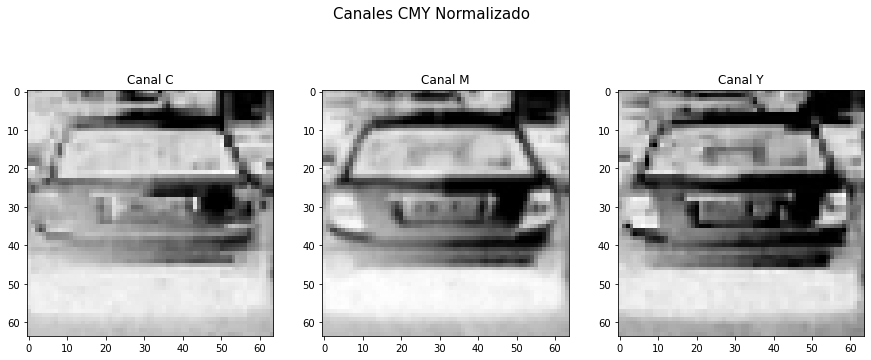

In [4]:
img_cmy = img_read('../data/vehicles/'+image_path)
img_cmy_norm = norm_image(img_cmy)

#Modelo CMY
img_C= 255 - img_cmy[:,:,0]
img_M = 255 - img_cmy[:,:,1]
img_Y = 255 - img_cmy[:,:,2]

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15, 6))

fig.suptitle('Canales CMY Original', fontsize=15)
ax1.set_title('Canal C')
ax1.imshow(img_C, cmap='gray')
ax2.set_title('Canal M')
ax2.imshow(img_M, cmap='gray')
ax3.set_title('Canal Y')
ax3.imshow(img_Y, cmap='gray')

#Modelo CMY
img_C= 255 - img_cmy_norm[:,:,0]
img_M = 255 - img_cmy_norm[:,:,1]
img_Y = 255 - img_cmy_norm[:,:,2]

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15, 6))

fig.suptitle('Canales CMY Normalizado', fontsize=15)
ax1.set_title('Canal C')
ax1.imshow(img_C, cmap='gray')
ax2.set_title('Canal M')
ax2.imshow(img_M, cmap='gray')
ax3.set_title('Canal Y')
ax3.imshow(img_Y, cmap='gray')

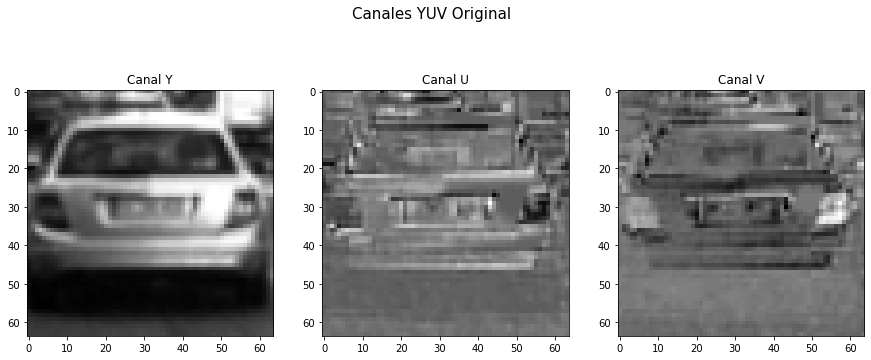

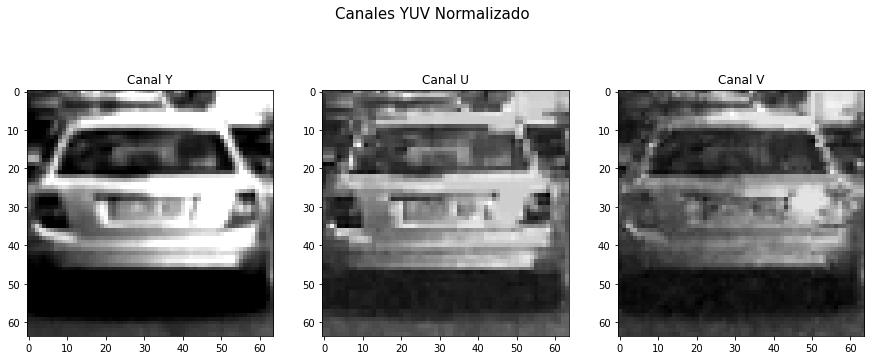

In [5]:
img_yuv = img_read('../data/vehicles/'+image_path, 'yuv')
img_yuv_norm = norm_image(img_yuv)

#Modelo YUV

img_Y = img_yuv[:,:,0]
img_U =  img_yuv[:,:,1]
img_V = img_yuv[:,:,2]

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15, 6))

fig.suptitle('Canales YUV Original', fontsize=15)
ax1.set_title('Canal Y')
ax1.imshow(img_Y, cmap='gray')
ax2.set_title('Canal U')
ax2.imshow(img_U, cmap='gray')
ax3.set_title('Canal V')
ax3.imshow(img_V, cmap='gray')

#Modelo YUV

img_Y = img_yuv_norm[:,:,0]
img_U =  img_yuv_norm[:,:,1]
img_V = img_yuv_norm[:,:,2]

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15, 6))

fig.suptitle('Canales YUV Normalizado', fontsize=15)
ax1.set_title('Canal Y')
ax1.imshow(img_Y, cmap='gray')
ax2.set_title('Canal U')
ax2.imshow(img_U, cmap='gray')
ax3.set_title('Canal V')
ax3.imshow(img_V, cmap='gray')

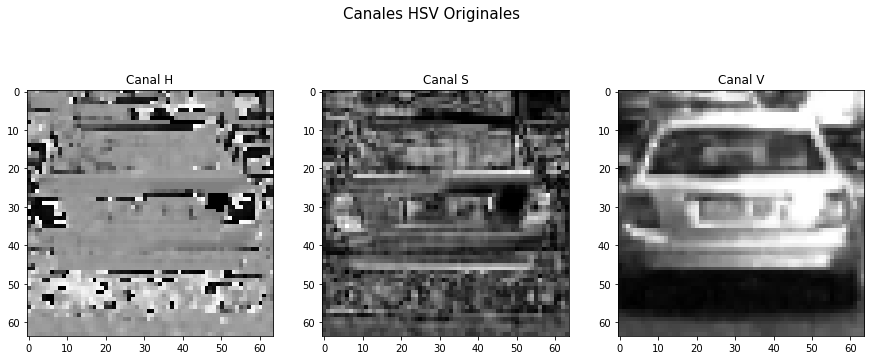

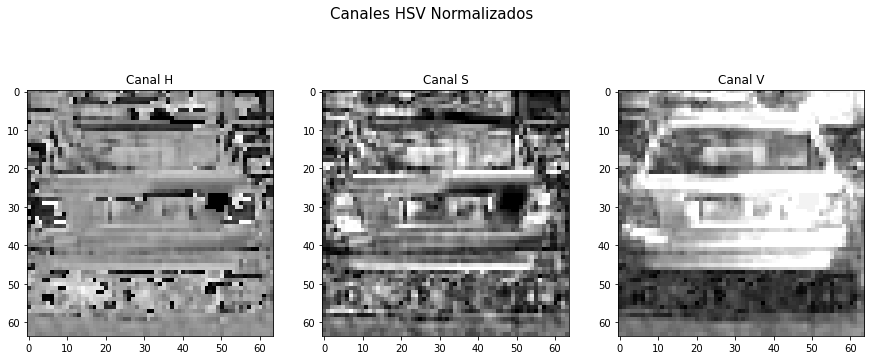

In [6]:
img_hsv = img_read('../data/vehicles/'+image_path, 'hsv')
img_hsv_norm = norm_image(img_hsv)

#Modelo HSV

img_H = img_hsv[:,:,0]
img_S =  img_hsv[:,:,1]
img_V = img_hsv[:,:,2]

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15, 6))

fig.suptitle('Canales HSV Originales', fontsize=15)
ax1.set_title('Canal H')
ax1.imshow(img_H, cmap='gray')
ax2.set_title('Canal S')
ax2.imshow(img_S, cmap='gray')
ax3.set_title('Canal V')
ax3.imshow(img_V, cmap='gray')

#Modelo HSV

img_H = img_hsv_norm[:,:,0]
img_S =  img_hsv_norm[:,:,1]
img_V = img_hsv_norm[:,:,2]

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15, 6))

fig.suptitle('Canales HSV Normalizados', fontsize=15)
ax1.set_title('Canal H')
ax1.imshow(img_H, cmap='gray')
ax2.set_title('Canal S')
ax2.imshow(img_S, cmap='gray')
ax3.set_title('Canal V')
ax3.imshow(img_V, cmap='gray')

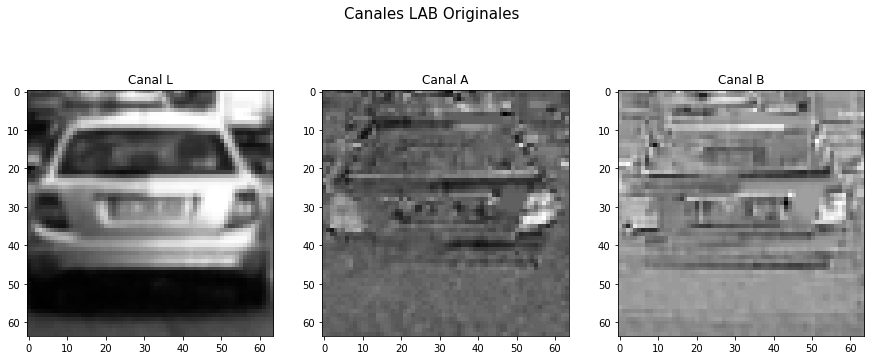

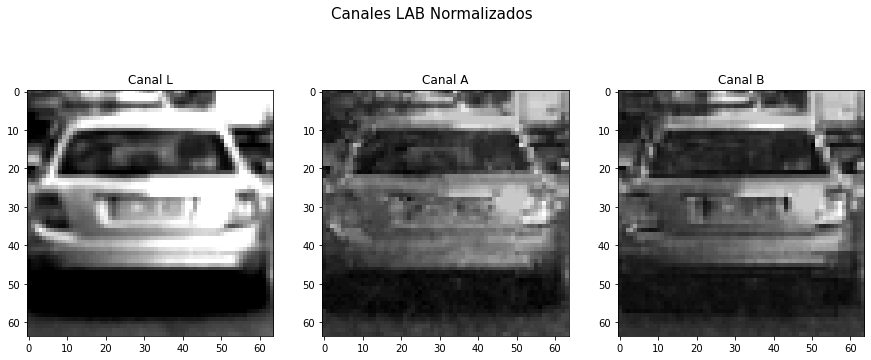

In [7]:
img_lab = img_read('../data/vehicles/'+image_path, 'lab')
img_lab_norm = norm_image(img_lab)

#Modelo LAB

img_L = img_lab[:,:,0]
img_A =  img_lab[:,:,1]
img_B = img_lab[:,:,2]

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15, 6))
fig.suptitle('Canales LAB Originales', fontsize=15)
ax1.set_title('Canal L')
ax1.imshow(img_L, cmap='gray')
ax2.set_title('Canal A')
ax2.imshow(img_A, cmap='gray')
ax3.set_title('Canal B')
ax3.imshow(img_B, cmap='gray')

#Modelo LAB

img_L = img_lab_norm[:,:,0]
img_A =  img_lab_norm[:,:,1]
img_B = img_lab_norm[:,:,2]

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15, 6))
fig.suptitle('Canales LAB Normalizados', fontsize=15)
ax1.set_title('Canal L')
ax1.imshow(img_L, cmap='gray')
ax2.set_title('Canal A')
ax2.imshow(img_A, cmap='gray')
ax3.set_title('Canal B')
ax3.imshow(img_B, cmap='gray')



### Utilizando la imagen de prueba "145.png", el canal que muestra mayor contraste entre el vehículo y el fondo es el M del espectro CMY.

### Aplicando un treshold y una función de detección de bordes podemos resaltar el auto

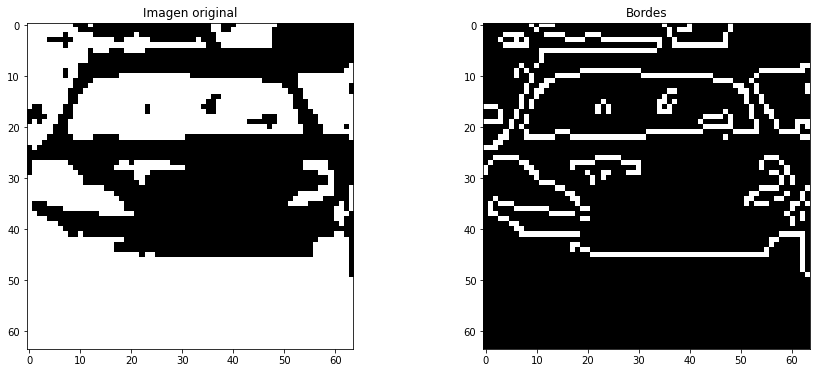

In [37]:
ret, thresh = cv2.threshold(img_M, 130, 255, cv2.THRESH_BINARY)
detect_edge(thresh, 80, 140)